<a href="https://colab.research.google.com/github/amannain122/credit_risk_analysis/blob/main/notebooks/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [4]:
df = pd.read_csv('final_data.csv')
df.head(5)

,person_income,loan_amnt,loan_int_rate,loan_percent_income,default_history,loan_grades,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_status
0,0.028557,0.014493,0.321348,0.109756,0,2,0.0,1.0,0.0,0
1,0.028557,0.144928,0.418539,0.682927,0,3,1.0,0.0,0.0,1
2,0.313616,1.000000,0.551124,0.634146,0,3,0.0,0.0,1.0,1
3,0.257012,1.000000,0.497191,0.658537,1,3,0.0,0.0,1.0,1
4,0.030087,0.057971,0.096629,0.292683,0,1,0.0,1.0,0.0,1


In [5]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Train Accuracy: 0.8507667473769168
Test Accuracy: 0.855067785668173
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4918
           1       0.72      0.48      0.58      1278

    accuracy                           0.86      6196
   macro avg       0.80      0.72      0.75      6196
weighted avg       0.84      0.86      0.84      6196



## Random Forest

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, test_pred_rf))
print('\n', classification_report(y_test, test_pred_rf))

Train Accuracy: 0.9987086359967716
Test Accuracy: 0.9039703034215623

               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4918
           1       0.83      0.68      0.74      1278

    accuracy                           0.90      6196
   macro avg       0.87      0.82      0.84      6196
weighted avg       0.90      0.90      0.90      6196



## XGBoost

In [31]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

train_pred_xgb = xgb_model.predict(X_train)
test_pred_xgb = xgb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred_xgb))
print("Test Accuracy:", accuracy_score(y_test, test_pred_xgb))
print(classification_report(y_test, test_pred_xgb))

Train Accuracy: 0.9357949959644875
Test Accuracy: 0.9091349257585539
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4918
           1       0.85      0.68      0.75      1278

    accuracy                           0.91      6196
   macro avg       0.89      0.82      0.85      6196
weighted avg       0.91      0.91      0.91      6196



## Perceptron

In [12]:
ai = Perceptron()
ai.fit(X_train, y_train)

train_pred_ai = ai.predict(X_train)
test_pred_ai = ai.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred_ai))
print("Test Accuracy:", accuracy_score(y_test, test_pred_ai))
print(classification_report(y_test, test_pred_ai))

Train Accuracy: 0.8208232445520581
Test Accuracy: 0.8202065848934796
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4918
           1       0.55      0.67      0.61      1278

    accuracy                           0.82      6196
   macro avg       0.73      0.77      0.75      6196
weighted avg       0.84      0.82      0.83      6196



## Comparisons

In [37]:
lr_auc = roc_curve(y_test, test_pred)
rf_auc = roc_curve(y_test, test_pred_rf)
xgb_auc = roc_curve(y_test, test_pred_xgb)
ai_auc = roc_curve(y_test, test_pred_ai)

scores = [lr_auc, rf_auc, xgb_auc, ai_auc]

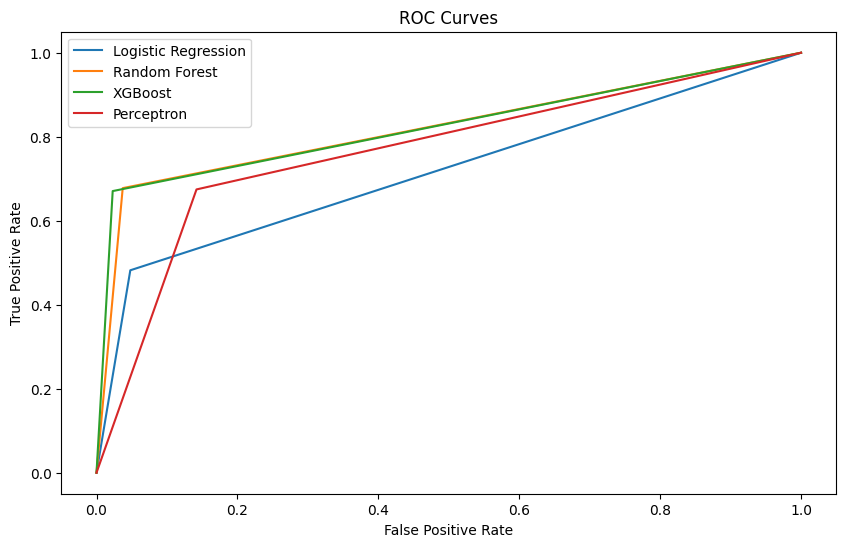

In [38]:
Models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Perceptron']
plt.figure(figsize=(10, 6))
for i, score in enumerate(scores):
    plt.plot(score[0], score[1], label=Models[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [40]:
lr_auc = roc_auc_score(y_test, test_pred)
rf_auc = roc_auc_score(y_test, test_pred_rf)
xgb_auc = roc_auc_score(y_test, test_pred_xgb)
ai_auc = roc_auc_score(y_test, test_pred_ai)

print("Logistic Regression AUC:", lr_auc)
print("Perceptron AUC:", ai_auc)
print("Random Forest AUC:", rf_auc)
print("XGBoost AUC:", xgb_auc)

Logistic Regression AUC: 0.7170080716552717
Perceptron AUC: 0.7662818899752498
Random Forest AUC: 0.8202055175933829
XGBoost AUC: 0.8238011049442469


## Model Tuning using Cross Validation

There is overfitting and that is due to multicollinearity let's train random forest and xgboost with pruning



In [32]:
xgb_model2 = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 6, n_estimators = 50)

param_grid = {
    'n_estimators': [50,100,150,200,250,300,400,450,500,600,700,650,550,750,850,800,900,950,1000,1050,1100],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [1,2,7,8,9,3, 4, 5, 6]
}

random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

train_pred_xgb = random_search.predict(X_train)
test_pred_xgb = random_search.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, train_pred_xgb))
print("Test Accuracy:", accuracy_score(y_test, test_pred_xgb))

Best Parameters: {'n_estimators': 800, 'max_depth': 2, 'learning_rate': 0.3}
Train Accuracy: 0.9170702179176755
Test Accuracy: 0.9138153647514525


In [35]:
rf = RandomForestClassifier()
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

train_pred_rf = random_search.predict(X_train)
test_pred_rf = random_search.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, test_pred_rf))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}
Train Accuracy: 0.9035512510088781
Test Accuracy: 0.9026791478373144


Random Forest AUC: 0.8202055175933829
XGBoost AUC: 0.8238011049442469


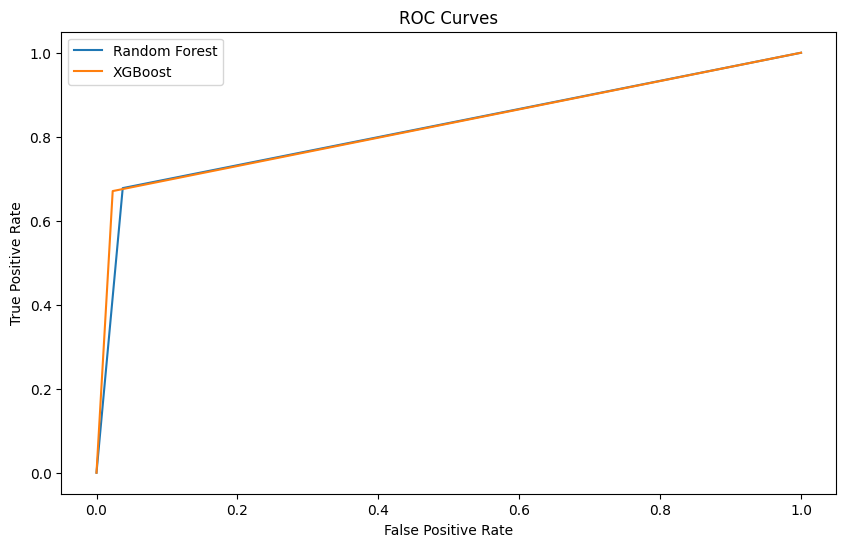

In [42]:
rf_2_auc = roc_auc_score(y_test, test_pred_rf)
xgb_2_auc = roc_auc_score(y_test, test_pred_xgb)

print("Random Forest AUC:", rf_2_auc)
print("XGBoost AUC:", xgb_2_auc)

rf_auc2 = roc_curve(y_test, test_pred_rf)
xgb_auc2 = roc_curve(y_test, test_pred_xgb)
best_scores = [rf_auc2, xgb_auc2]
best_models = ['Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
for i, score in enumerate(best_scores):
    plt.plot(score[0], score[1], label=best_models[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

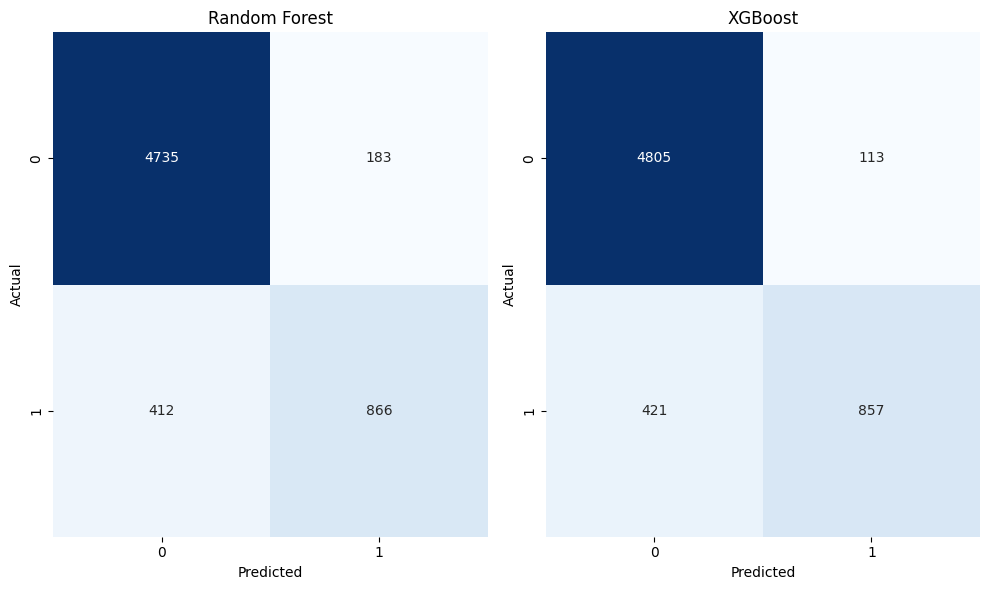

In [51]:
rf_cfn = confusion_matrix(y_test, test_pred_rf)
xgb_cfn = confusion_matrix(y_test, test_pred_xgb)
cfn = [rf_cfn, xgb_cfn]
cfn_models = ['Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
for i, cfn_matrix in enumerate(cfn):
    plt.subplot(1, 2, i + 1)
    sns.heatmap(cfn_matrix, annot=True, fmt='d', cmap='Blues', cbar = False)
    plt.title(cfn_models[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [57]:
import joblib

joblib.dump(xgb_model2, 'best_model.pkl')
joblib.dump(rf, 'rf.pkl')

['rf.pkl']